## EDA - Proyecto Final G4 Inventory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ordenes_Compra = pd.read_csv('Dim_OC.csv')
Producto = pd.read_csv('Dim_Producto.csv')
Vendor= pd.read_csv('Dim_Vendor.csv')
F_Ventas = pd.read_csv('Fact_Ventas.csv')
F_Compras = pd.read_csv('Fact_Compras.csv')
Inv_InicioYear = pd.read_csv('Fact_InvInicioYear.csv')
Inv_FinYear = pd.read_csv('Fact_InvFinYear.csv')

In [3]:
Ordenes_Compra.columns

Index(['InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars',
       'Freight', 'OrdenCompraID', 'VendorNumber', 'VendorName'],
      dtype='object')

In [4]:
Producto.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorID', 'ProductoID'],
      dtype='object')

In [5]:
Vendor.columns

Index(['VendorNumber', 'VendorName', 'VendorID'], dtype='object')

In [6]:
Inv_InicioYear.columns

Index(['InventoryId', 'Store', 'City', 'onHand', 'startDate', 'ProductoID'], dtype='object')

In [7]:
Inv_FinYear.columns

Index(['InventoryId', 'Store', 'City', 'onHand', 'endDate', 'ProductoID'], dtype='object')

In [8]:
F_Ventas.columns

Index(['InventoryId', 'Store', 'SalesQuantity', 'SalesDollars', 'SalesPrice',
       'SalesDate', 'ExciseTax', 'ProductoID'],
      dtype='object')

In [9]:
F_Compras.columns

Index(['InventoryId', 'Store', 'ReceivingDate', 'Quantity', 'Dollars',
       'OrdenCompraID', 'ProductoID'],
      dtype='object')

## Ventas mensuales 2016

In [10]:
# Aseguramos que la columna 'SalesDate' esté en formato datetime
F_Ventas['SalesDate'] = pd.to_datetime(F_Ventas['SalesDate'])

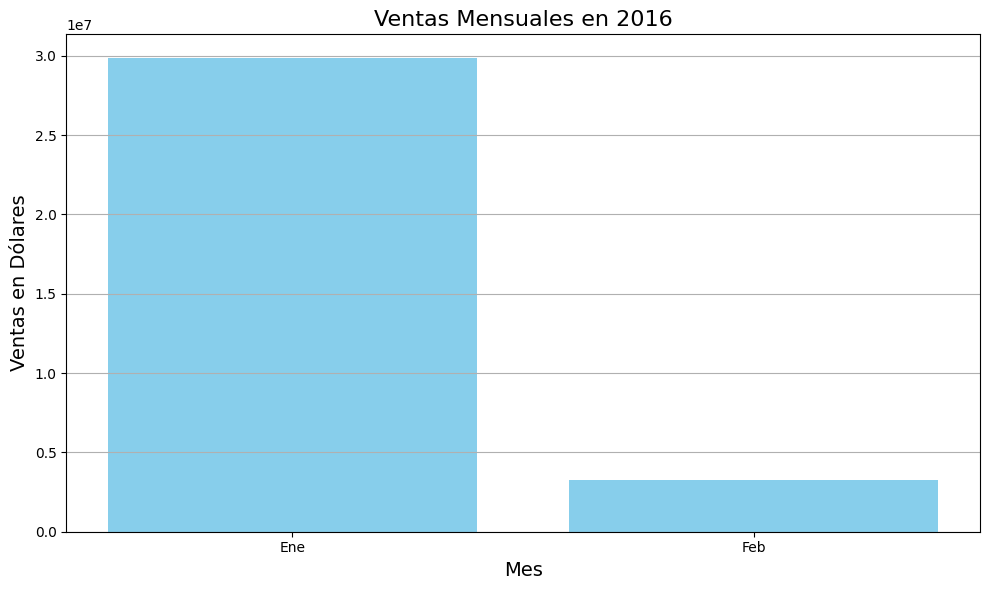

In [12]:
# Filtrar los datos para el año 2016
df_2016 = F_Ventas[F_Ventas['SalesDate'].dt.year == 2016]

# Agrupar por mes y sumar las ventas
ventas_mensuales = df_2016.groupby(df_2016['SalesDate'].dt.month)['SalesDollars'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ventas_mensuales.columns = ['Mes', 'Ventas']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(ventas_mensuales['Mes'], ventas_mensuales['Ventas'], color='skyblue')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ventas en Dólares', fontsize=14)
plt.title('Ventas Mensuales en 2016', fontsize=16)

# Configurar etiquetas de los meses solo para los que tienen datos
etiquetas_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
meses_con_datos = ventas_mensuales['Mes'].tolist()  # Obtener los meses de las ventas
plt.xticks(meses_con_datos, [etiquetas_meses[m - 1] for m in meses_con_datos])  # Usar las etiquetas correspondientes

plt.grid(axis='y')  # Agregar cuadrícula solo en el eje y
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico


## Compras mensuales 2016

In [13]:
# Aseguramos que la columna 'ReceivingDate' esté en formato datetime
F_Compras['ReceivingDate'] = pd.to_datetime(F_Compras['ReceivingDate'])

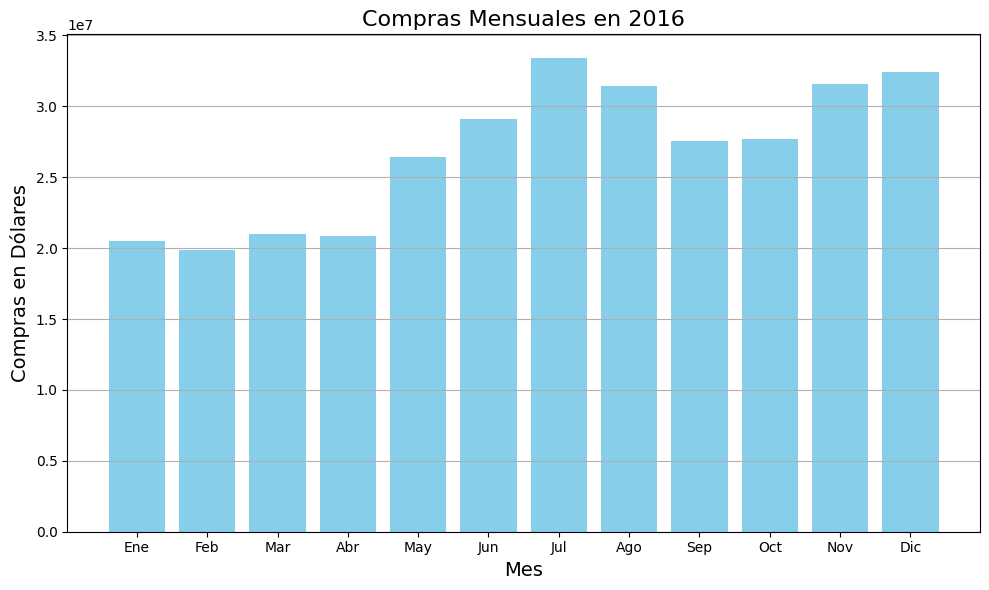

In [14]:
# Filtrar los datos para el año 2016
df_2016 = F_Compras[F_Compras['ReceivingDate'].dt.year == 2016]

# Agrupar por mes y sumar las compras
compras_mensuales = df_2016.groupby(df_2016['ReceivingDate'].dt.month)['Dollars'].sum().reset_index()

# Renombrar las columnas para mayor claridad
compras_mensuales.columns = ['Mes', 'Compras']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(compras_mensuales['Mes'], compras_mensuales['Compras'], color='skyblue')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Compras en Dólares', fontsize=14)
plt.title('Compras Mensuales en 2016', fontsize=16)

# Configurar etiquetas de los meses solo para los que tienen datos
etiquetas_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
meses_con_datos = compras_mensuales['Mes'].tolist()  # Obtener los meses de las compras
plt.xticks(meses_con_datos, [etiquetas_meses[m - 1] for m in meses_con_datos])  # Usar las etiquetas correspondientes

plt.grid(axis='y')  # Agregar cuadrícula solo en el eje y
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico


## Comparación Mensual de Compras y Ventas

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


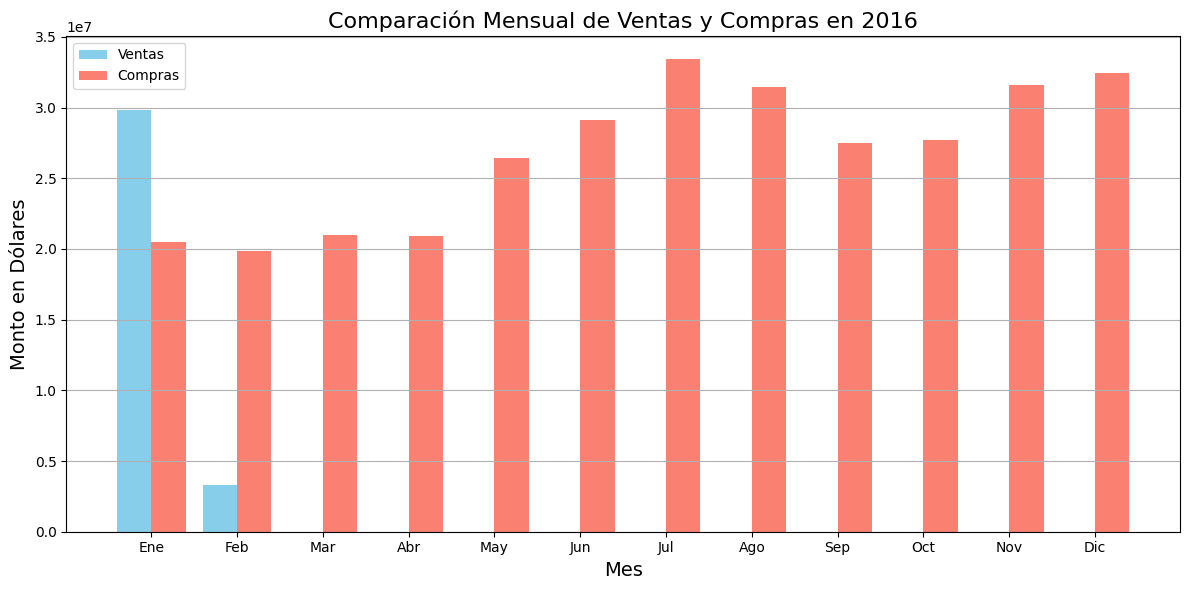

In [16]:
# Filtrar los datos para el año 2016
ventas_2016 = F_Ventas[F_Ventas['SalesDate'].dt.year == 2016]
compras_2016 = F_Compras[F_Compras['ReceivingDate'].dt.year == 2016]

# Agrupar por mes y sumar las ventas
ventas_mensuales = ventas_2016.groupby(ventas_2016['SalesDate'].dt.month)['SalesDollars'].sum().reset_index()
ventas_mensuales.columns = ['Mes', 'Ventas']

# Agrupar por mes y sumar las compras
compras_mensuales = compras_2016.groupby(compras_2016['ReceivingDate'].dt.month)['Dollars'].sum().reset_index()
compras_mensuales.columns = ['Mes', 'Compras']

# Crear un DataFrame con todos los meses del año
meses = pd.DataFrame({'Mes': range(1, 13)})

# Combinar los datos de ventas y compras en un solo DataFrame, llenando con 0 donde no hay datos
comparacion_mensual = meses.merge(ventas_mensuales, on='Mes', how='left').merge(compras_mensuales, on='Mes', how='left').fillna(0)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Crear barras para ventas y compras
bar_width = 0.4  # Ancho de las barras
x = comparacion_mensual['Mes']

# Las posiciones para las barras
pos_ventas = x - bar_width / 2  # Posiciones para las barras de ventas
pos_compras = x + bar_width / 2  # Posiciones para las barras de compras

# Graficar las barras
plt.bar(pos_ventas, comparacion_mensual['Ventas'], width=bar_width, label='Ventas', color='skyblue')
plt.bar(pos_compras, comparacion_mensual['Compras'], width=bar_width, label='Compras', color='salmon')

# Configurar etiquetas y título
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Monto en Dólares', fontsize=14)
plt.title('Comparación Mensual de Ventas y Compras en 2016', fontsize=16)
plt.xticks(comparacion_mensual['Mes'], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])  # Etiquetas de los meses
plt.grid(axis='y')  # Agregar cuadrícula solo en el eje y
plt.legend()  # Mostrar leyenda
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico


## TOP 10 productos mas vendidos

In [17]:
F_Ventas.columns

Index(['InventoryId', 'Store', 'SalesQuantity', 'SalesDollars', 'SalesPrice',
       'SalesDate', 'ExciseTax', 'ProductoID'],
      dtype='object')

In [18]:
Producto.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorID', 'ProductoID'],
      dtype='object')

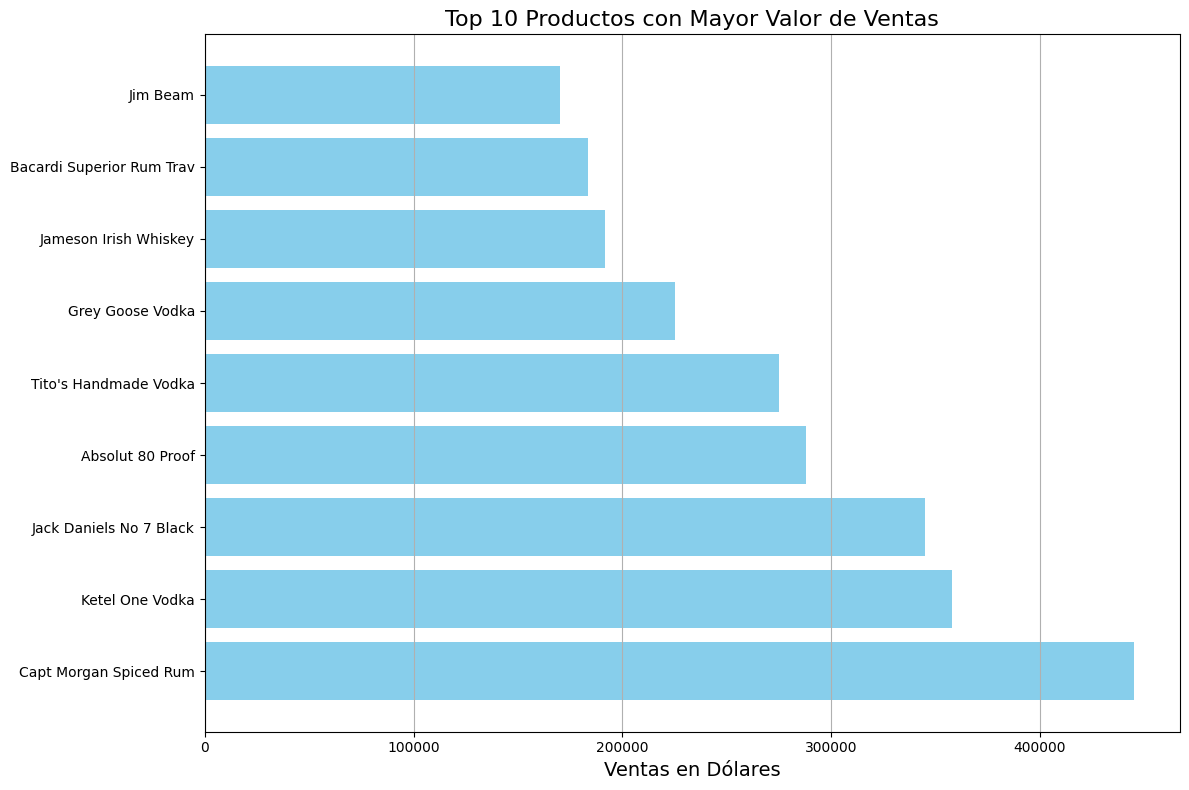

In [19]:
# Agrupar las ventas por ProductoID y sumar las ventas
ventas_por_producto = F_Ventas.groupby('ProductoID')['SalesDollars'].sum().reset_index()

# Unir con el DataFrame de productos para obtener la descripción
ventas_con_descripcion = ventas_por_producto.merge(Producto[['ProductoID', 'Description']], on='ProductoID', how='left')

# Ordenar por las ventas y seleccionar los top 10
top_10_productos = ventas_con_descripcion.nlargest(10, 'SalesDollars')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Tamaño de la figura
plt.barh(top_10_productos['Description'], top_10_productos['SalesDollars'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Ventas en Dólares', fontsize=14)
plt.title('Top 10 Productos con Mayor Valor de Ventas', fontsize=16)
plt.grid(axis='x')  # Agregar cuadrícula solo en el eje x
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico


## TOP 10 productos mas comprados

In [20]:
F_Compras.columns

Index(['InventoryId', 'Store', 'ReceivingDate', 'Quantity', 'Dollars',
       'OrdenCompraID', 'ProductoID'],
      dtype='object')

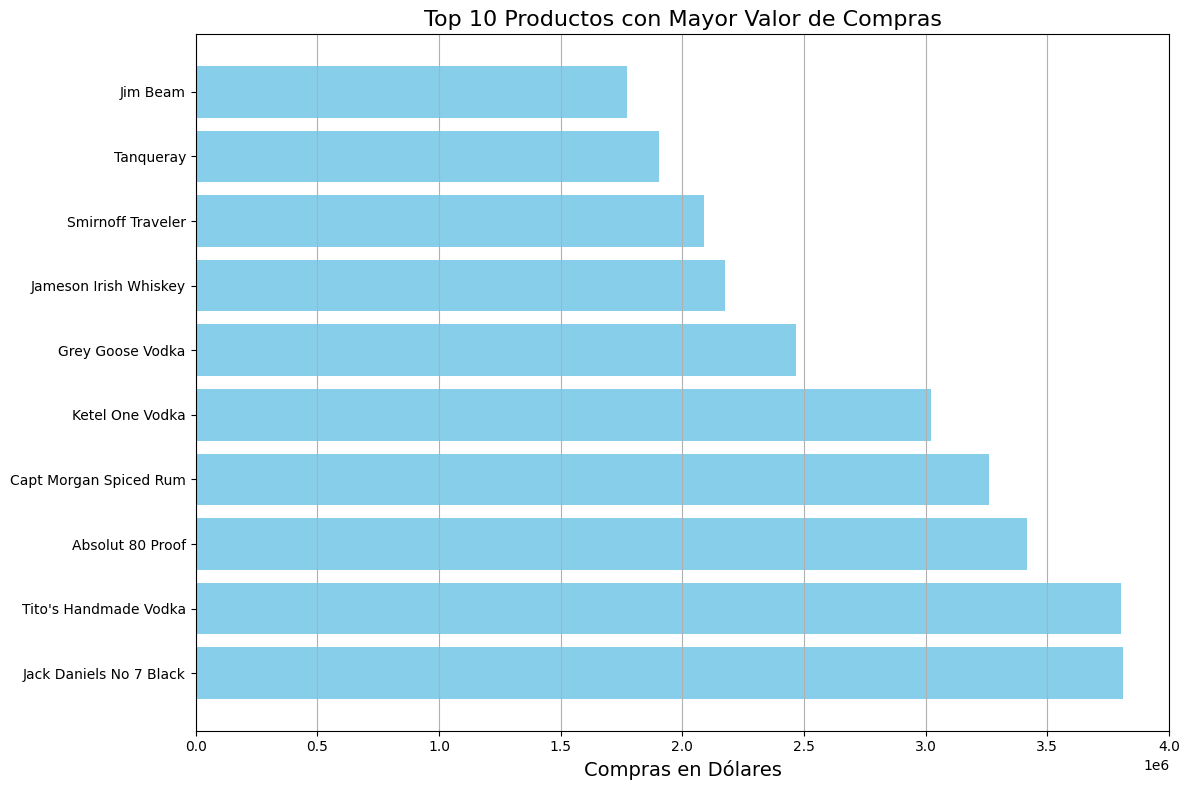

In [21]:
# Agrupar las compras por ProductoID y sumar las compras
compras_por_producto = F_Compras.groupby('ProductoID')['Dollars'].sum().reset_index()

# Unir con el DataFrame de productos para obtener la descripción
compras_con_descripcion = compras_por_producto.merge(Producto[['ProductoID', 'Description']], on='ProductoID', how='left')

# Ordenar por las compras y seleccionar los top 10
top_10_productos = compras_con_descripcion.nlargest(10, 'Dollars')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Tamaño de la figura
plt.barh(top_10_productos['Description'], top_10_productos['Dollars'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Compras en Dólares', fontsize=14)
plt.title('Top 10 Productos con Mayor Valor de Compras', fontsize=16)
plt.grid(axis='x')  # Agregar cuadrícula solo en el eje x
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico


## KPI de Inventario

In [22]:
F_Ventas.columns

Index(['InventoryId', 'Store', 'SalesQuantity', 'SalesDollars', 'SalesPrice',
       'SalesDate', 'ExciseTax', 'ProductoID'],
      dtype='object')

In [25]:
F_Ventas.shape

(1048573, 8)

In [24]:
F_Compras.columns

Index(['InventoryId', 'Store', 'ReceivingDate', 'Quantity', 'Dollars',
       'OrdenCompraID', 'ProductoID'],
      dtype='object')

In [26]:
F_Compras.shape

(2372474, 7)

In [27]:
Inv_FinYear.columns

Index(['InventoryId', 'Store', 'City', 'onHand', 'endDate', 'ProductoID'], dtype='object')

In [28]:
Inv_InicioYear.columns

Index(['InventoryId', 'Store', 'City', 'onHand', 'startDate', 'ProductoID'], dtype='object')

In [29]:
Producto.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorID', 'ProductoID'],
      dtype='object')

## TASA DE ROTACION DE INVENTARIO

In [40]:
# 1. Hallar Costo Total de Bienes Vendidos
# Filtrar ventas de 2016
# Filtrar ventas de 2016
F_Ventas['SalesDate'] = pd.to_datetime(F_Ventas['SalesDate'])  # Asegúrate de que la columna de fecha esté en formato datetime
ventas_2016 = F_Ventas[F_Ventas['SalesDate'].dt.year == 2016]  # Eliminar los corchetes para crear el DataFrame correctamente

# Obtener los ProductoID vendidos en 2016
producto_ids_vendidos = ventas_2016['ProductoID'].unique()

# Filtrar compras para los productos vendidos en 2016
costo_bienes_vendidos = F_Compras[F_Compras['ProductoID'].isin(producto_ids_vendidos)]['Dollars'].sum()
costo_bienes_vendidos_diario = costo_bienes_vendidos/60


# 2. Hallar Valor Inventario Promedio
# Calcular el Valor Inventario Inicio 2016
# Multiplicar cantidad por precio unitario
inventario_inicio = Inv_InicioYear.merge(Producto[['ProductoID', 'Price']], on='ProductoID', how='left')
inventario_inicio['ValorInventarioInicio'] = inventario_inicio['onHand'] * inventario_inicio['Price']
valor_inventario_inicio = inventario_inicio['ValorInventarioInicio'].sum()

# Calcular el Valor Inventario Fin 2016
inventario_fin = Inv_FinYear.merge(Producto[['ProductoID', 'Price']], on='ProductoID', how='left')
inventario_fin['ValorInventarioFin'] = inventario_fin['onHand'] * inventario_fin['Price']
valor_inventario_fin = inventario_fin['ValorInventarioFin'].sum()

# Calcular Valor Inventario Promedio
valor_inventario_promedio = (valor_inventario_inicio + valor_inventario_fin) / 2

# 3. Calcular Tasa de Rotación de Inventario
tasa_rotacion_inventario = costo_bienes_vendidos_diario / valor_inventario_promedio if valor_inventario_promedio != 0 else 0

# Mostrar resultado
print(f'Tasa de Rotación de Inventario: {tasa_rotacion_inventario:.2f}')


Tasa de Rotación de Inventario: 0.07


In [31]:
Producto.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume            float64
Classification      int64
PurchasePrice     float64
VendorID            int64
ProductoID          int64
dtype: object

In [32]:
Inv_FinYear.dtypes

InventoryId    object
Store           int64
City           object
onHand          int64
endDate        object
ProductoID      int64
dtype: object

In [33]:
Inv_InicioYear.dtypes

InventoryId    object
Store           int64
City           object
onHand          int64
startDate      object
ProductoID      int64
dtype: object

In [34]:
F_Ventas.dtypes

InventoryId              object
Store                     int64
SalesQuantity             int64
SalesDollars            float64
SalesPrice              float64
SalesDate        datetime64[ns]
ExciseTax               float64
ProductoID                int64
dtype: object

In [35]:
F_Compras.dtypes

InventoryId              object
Store                     int64
ReceivingDate    datetime64[ns]
Quantity                  int64
Dollars                 float64
OrdenCompraID             int64
ProductoID                int64
dtype: object

## TASA DIAS DE INVENTARIO

In [38]:
costo_bienes_vendidos_60d =costo_bienes_vendidos/60
Tasa_dias_inventario =	valor_inventario_promedio/(costo_bienes_vendidos_60d)
print(f'Tasa de dias de Inventario: {Tasa_dias_inventario:.2f}')

Tasa de dias de Inventario: 14.84


## VALOR PROMEDIO DE INVNETARIO

In [39]:
# Valor Promedio de Inventario

print(f'El valor promedio de Inventario es: {valor_inventario_promedio:.2f}')

El valor promedio de Inventario es: 75054313.92


## TASA DE OBSOLESCENCIA

In [42]:
# Paso 1: Calcular cantidad de inventario inicio de año
cantidad_inventario_inicio = Inv_InicioYear['onHand'].sum()

# Paso 2: Calcular cantidad de productos vendidos
cantidad_productos_vendidos = F_Ventas['SalesQuantity'].sum()

# Paso 3: Calcular cantidad de productos no vendidos
cantidad_productos_no_vendidos = cantidad_inventario_inicio - (cantidad_productos_vendidos)

# Paso 4: Cantidad de inventario (es igual a la cantidad de inventario inicio de año)
cantidad_inventario = cantidad_inventario_inicio

# Paso 5: Calcular la tasa de obsolescencia
tasa_obsolescencia = cantidad_productos_no_vendidos / cantidad_inventario

# Mostrar resultado
print(f"Tasa de Obsolescencia: {tasa_obsolescencia:.2%}")


Tasa de Obsolescencia: 41.91%


## LEAD TIME DE LOS TOP10 PRODUCTOS MAS VENDIDOS

In [43]:
Ordenes_Compra.columns

Index(['InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars',
       'Freight', 'OrdenCompraID', 'VendorNumber', 'VendorName'],
      dtype='object')

In [47]:
import pandas as pd

# Paso 1: Identificar los 10 productos más vendidos
ventas_por_producto = F_Ventas.groupby('ProductoID')['SalesQuantity'].sum()
top_10_productos = ventas_por_producto.nlargest(10).index

# Paso 2: Filtrar las compras de los productos más vendidos
compras_top_10 = F_Compras[F_Compras['ProductoID'].isin(top_10_productos)]

# Paso 3: Unir F_Compras con Ordenes_Compra para obtener PODate
compras_con_pedido = compras_top_10.merge(Ordenes_Compra[['OrdenCompraID', 'PODate']],
                                          on='OrdenCompraID', how='left')

# Paso 4: Convertir las columnas 'ReceivingDate' y 'PODate' a formato datetime
compras_con_pedido['ReceivingDate'] = pd.to_datetime(compras_con_pedido['ReceivingDate'], errors='coerce')
compras_con_pedido['PODate'] = pd.to_datetime(compras_con_pedido['PODate'], errors='coerce')

# Paso 5: Calcular el Lead Time (ReceivingDate - PODate)
compras_con_pedido['LeadTime'] = (compras_con_pedido['ReceivingDate'] - compras_con_pedido['PODate']).dt.days

# Paso 6: Calcular el Lead Time promedio por producto
leadtime_promedio = compras_con_pedido.groupby('ProductoID')['LeadTime'].mean().reset_index()

# Paso 7: Relacionar con la descripción del producto
leadtime_promedio_con_desc = leadtime_promedio.merge(Producto[['ProductoID', 'Description']],
                                                     on='ProductoID', how='left')
# Paso 8: Mostrar el resultado (LeadTime promedio de los top 10 productos más vendidos)

# Mostrar el mensaje antes del resultado
resultado = leadtime_promedio_con_desc[['Description', 'LeadTime']]

# Ajustar el índice para que comience desde 1
resultado.index = resultado.index + 1

# Mostrar el mensaje antes del resultado
print("Lead Time de los TOP 10 productos más vendidos:\n")
print(resultado)


Lead Time de los TOP 10 productos más vendidos:

                     Description  LeadTime
1                     Yukon Jack  7.783557
2                Ketel One Vodka  7.454157
3       Smirnoff Raspberry Vodka  7.790905
4                     Skyy Vodka  7.526623
5       Smirnoff Blueberry Vodka  7.795886
6     Smirnoff Green Apple Vodka  7.750195
7         Capt Morgan Spiced Rum  7.450841
8   Dr McGillicuddy's Mentholmnt  7.542218
9               Absolut 80 Proof  7.363093
10             Smirnoff 80 Proof  7.717917
